In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Image Load

In [2]:
image = cv2.imread("./imgs/shapes-01.jpeg",cv2.COLOR_BGR2RGB)

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # gray Image 로 변환
gaussian = cv2.GaussianBlur(gray,(0,0),1) # 가우시안 블러

(-0.5, 3067.5, 2456.5, -0.5)

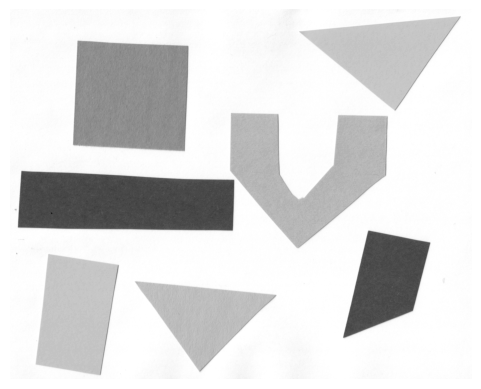

In [4]:
plt.imshow(gaussian, cmap="gray")
plt.axis('off')  # 축 제거
# plt.savefig("image-segmentation-4.png", bbox_inches='tight', pad_inches=0)  # save image

# Hisogram

Text(0, 0.5, 'Pixels Counts')

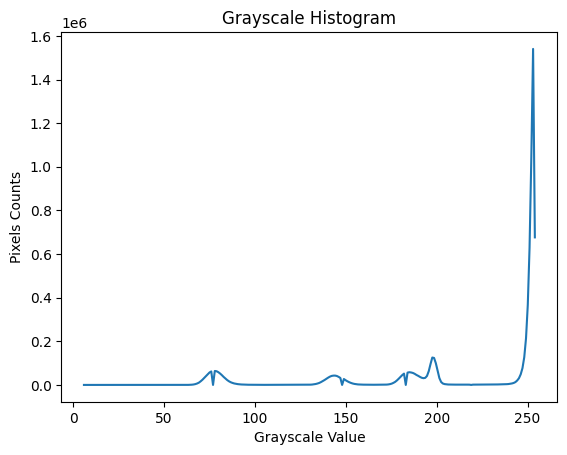

In [5]:
histogram, bin_edges = np.histogram(gaussian, bins=256)
# histogram, bin_edges = np.histogram(gaussian, bins=1000, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("Grayscale Value")
ax.set_ylabel("Pixels Counts")

# 1. Thresholding

(-0.5, 3067.5, 2456.5, -0.5)

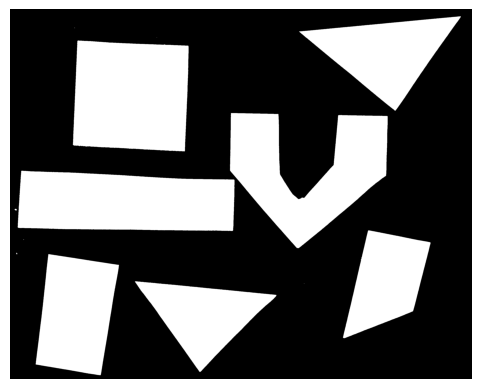

In [6]:
# create a mask based on the threshold
t = 225
binary_mask = gaussian < t

plt.imshow(binary_mask, cmap = 'gray')
plt.axis('off')
# plt.savefig("./imgs/image-segmentation-5.png", bbox_inches='tight', pad_inches=0)  # save image

# 2. Otsu Thresholding

In [70]:
img = cv2.imread('./imgs/camera-person.png', cv2.IMREAD_GRAYSCALE)

In [71]:
t, otsu_threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [72]:
t

88.0

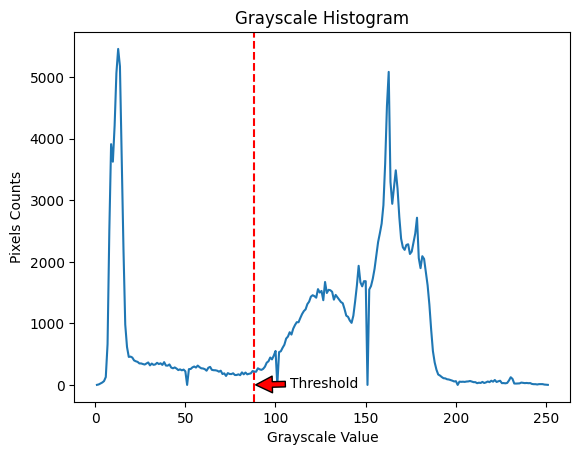

In [73]:
histogram, bin_edges = np.histogram(img, bins=256)

fig, ax = plt.subplots()
ax.axvline(x=t, color='r', linestyle='--')
ax.annotate('Threshold', xy=(t, 0), xytext=(t+20, -50), arrowprops=dict(facecolor='red', shrink=0.05))
ax.plot(bin_edges[0:-1], histogram)

ax.set_title("Grayscale Histogram")
ax.set_xlabel("Grayscale Value")
ax.set_ylabel("Pixels Counts")
# plt.savefig("./imgs/image-segmentation-7.png", bbox_inches='tight', pad_inches=0)  # 이미지 저장
plt.show()

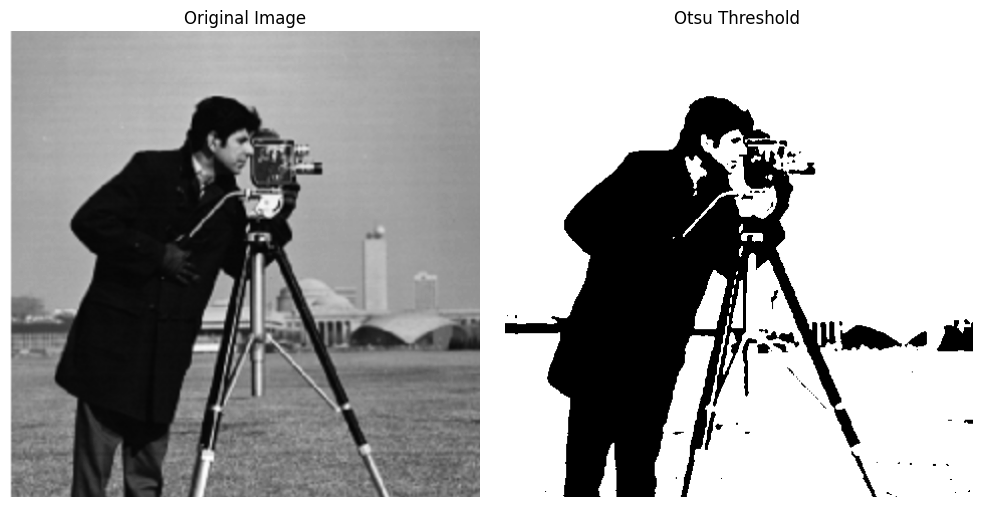

In [74]:
plt.figure(figsize=(10, 5))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 이진화된 이미지
plt.subplot(1, 2, 2)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Threshold')
plt.axis('off')

plt.tight_layout()  # subplot 간격 조절
# plt.savefig("./imgs/image-segmentation-8.png", bbox_inches='tight', pad_inches=0)  # 이미지 저장
plt.show()

# 3. Adaptive Thresholding

In [76]:
img = cv2.imread('./imgs/sudoku.png', cv2.IMREAD_GRAYSCALE)
blk_size = 9        # 블럭 사이즈
C = 5   

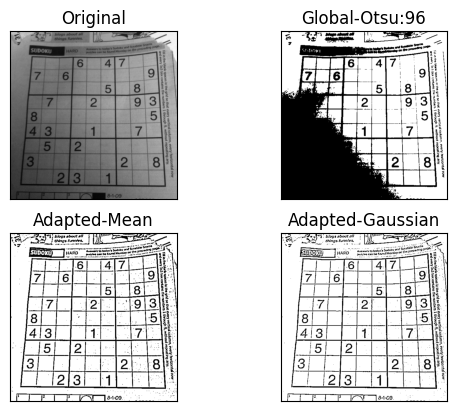

In [79]:
# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
# plt.figure(figsize=(10, 5))

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])
# plt.savefig("./imgs/image-segmentation-11.png", bbox_inches='tight', pad_inches=0)  # 이미지 저장